## All mentions of Ethereum on Reddit, up to 1st of November 2021

### Context
#### The web3.0 world of cryptocurrency has taken the Internet by storm. The decentralized computer and financial platform Ethereum is one of the most important and well-known ones. In this dataset, we explore the social network behaviour and discussions happening around Ethereum over the course of its evolution.


In [69]:
from IPython.display import Image
Image(url = "https://zipmex.com/static/edf2e1a924abeb98ea0e25366cca2140/77c5c/B1575-Converted.png")

### Content
#### This dataset contains a comprehensive collection of  comments mentioning the term "Ethereum" in their title and body text respectively. The data is procured using [SocialGrep.](https://socialgrep.com/datasets?utm_source=kaggle&utm_medium=link&utm_campaign=theredditethereumdataset#the-reddit-ethereum-dataset)
#### The posts and the comments are labelled with their score and sentiment scores

### Inspiration
#### This dataset concerns a new technology being adopted in real time. What can we learn from the changes in the public's sentiment?

In [70]:
# import relevant libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import yfinance as yf

In [71]:
# use read_scv function to read the data

com_data = pd.read_csv("the-reddit-ethereum-dataset-comments.csv")

In [72]:
# convert data into pandas dataframe.

df = pd.DataFrame(com_data)

In [73]:
# adjusting the column width to see the whole cell.
pd.set_option('display.max_colwidth', None)


In [74]:
# Convert the Unix timestamp to a readable date

df['time'] = pd.to_datetime(df['created_utc'], unit='s').apply(lambda x: x.to_datetime64())

In [75]:
df.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,time
0,comment,hiy7901,2sngy,buttcoin,False,1635811192,https://old.reddit.com/r/Buttcoin/comments/qjetnn/a_look_back_at_the_first_bitcoin_ponzi_scheme/hiy7901/,"Surely you must be aware of network effect.\n\nEthereum is more valuable than some obscure fringe network because people actually use Ethereum.\n\nThis is a principle Metcalfe and Gilder originally applied to telephone networks. If a telephone network connects you to half the planet, it will be exponentially more valuable than one that connects just to your mum.\n\nNow extend that concept to cryptocurrency. If a cryptocurrency is highly liquid, accepted by a large sum of people, and can be used in a great plurality of DeFi protocols, it is going to be in much greater demand than cryptocurrencies to which those statements cannot be applied.",0.9575,1,2021-11-01 23:59:52
1,comment,hiy75z3,2zf9m,ethereum,False,1635811154,https://old.reddit.com/r/ethereum/comments/qkp1sg/too_expensive_to_use_dont_get_mad/hiy75z3/,"For real man, the gas fees are more than the transaction value sometimes. I dont buy that theres no easy solution, the binance smart chain operates for pennies in gas fees.\n\nFrankly once I've sold my liquidity pool assets im done fucking with anything on the Ethereum network",0.3468,-2,2021-11-01 23:59:14
2,comment,hiy74ov,2skbb,bitcoinmining,False,1635811138,https://old.reddit.com/r/BitcoinMining/comments/qkkn5h/s19s_profits_6_months_from_now/hiy74ov/,"What happens with bitcoin has implications for the wider crypto asset universe, including ether, the currency of the Ethereum smart contract network. Ether is both highly correlated with bitcoin and more volatile than bitcoin. To borrow the lingo of equity markets, this makes ether a high beta version of bitcoin. When bitcoin prices rise, ether prices tend to rise more. When bitcoin prices fall, ether prices tend to fall even further.\n\nhttps://www.reuters.com/article/sponsored/bitcoin-ethereum-performance\n\nSymbiosis\n\n the majority of buyers purchase some Bitcoin first, and then trade it for their altcoin of choice. Therefore, if someone holding altcoins wants out of the crypto industry altogether, it’s most likely they would first sell their assets for Bitcoin, and then convert Bitcoin back to a fiat currency. This symbiotic relationship means that the value of different altcoins is often tied to Bitcoin. \n\nhttps://decrypt.co/42834/why-do-altcoins-usually-follow-bitcoin?amp=1",0.8074,2,2021-11-01 23:58:58
3,comment,hiy739e,3b6pl,ethstaker,False,1635811120,https://old.reddit.com/r/ethstaker/comments/qkdq9v/eli5_could_an_established_validator_have/hiy739e/,"Not exactly. Ethereum addresses that made deposits to the Beacon Chain contract before genesis received the NODE drop and POAP. The validators themselves didn't receive anything. So an address with that history might have more intrinsic value, but it doesn't do anything for the validator (which are probably owned by the same person, but they are still different things).",0.0745,2,2021-11-01 23:58:40
4,comment,hiy6wh2,4iplq8,babydogecoin,False,1635811036,https://old.reddit.com/r/BabyDogeCoin/comments/qklqt1/45mill_and_counting/hiy6wh2/,Is the babydoge on the ethereum network the same coin?,0.0000,0,2021-11-01 23:57:16


### Checking the comments dataset


In [76]:
# total number of unique users
num_users = df['id'].nunique()
print('Total number of users: {}'.format(num_users))

Total number of users: 1132331


In [77]:
# time period 
period = df['time'].max() - df['time'].min()
print('Time period for which we have the data: {}'.format(period))

Time period for which we have the data: 3813 days 10:07:22


In [78]:
# oldest and most recent comments 
print('Oldest comment: {}'.format(df['time'].min()))
print('Most recent comment: {}'.format(df['time'].max()))

Oldest comment: 2011-05-25 13:52:30
Most recent comment: 2021-11-01 23:59:52


In [79]:
subreddit = df['subreddit.name'].value_counts()[:8].sort_values(ascending=False)
print(subreddit)

cryptocurrency    195245
ethtrader         169239
ethereum          136202
ethfinance         44657
bitcoin            35887
btc                32296
dogecoin           14017
ethermining        13543
Name: subreddit.name, dtype: int64


In [80]:
# Find the subreddits containing the most number of ETH mentions 
# create a pie chart 
sub_df = pd.DataFrame(subreddit)
sub_df.reset_index(inplace=True)

In [81]:
sub_df.rename(columns={'index':'subreddit','subreddit.name':'values'},inplace=True)


In [82]:
# the top 8
df2 = sub_df[:8].copy()

In [83]:
# others category
new_row = pd.DataFrame(data = {
    'subreddit' : ['others'],
    'values' : [df['subreddit.name'].value_counts()[8:].sum()]
})


In [84]:
# combining top 5 with others
new_df = pd.concat([df2, new_row])

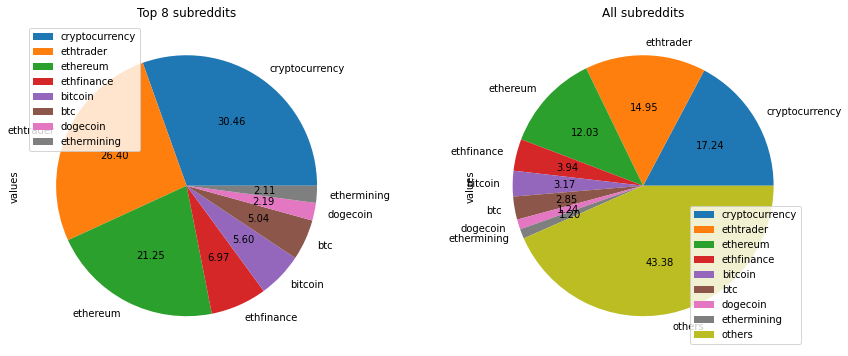

In [85]:
#plotting -- for comparison left all countries and right 
#the others combined
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sub_df.plot(kind = 'pie', y = 'values', labels = sub_df['subreddit'], autopct='%.2f', ax = axes[0])
new_df.plot(kind = 'pie', y = 'values', labels = new_df['subreddit'], autopct='%.2f', ax = axes[1])
axes[0].set_title('Top 8 subreddits')
axes[0].legend(loc="upper left")
axes[1].set_title('All subreddits')
axes[1].legend(loc="lower right")
plt.show()


#### We can see the subreddits where ETH is mentioned the most are: cryptocurrency, ethtrader and ethereum. 
#### This is not surprising as these subreddits contain the highest number of subscribers.

### Next we will look at the reddit trend in the number of ETH mentioned in comments from 2011 to 2021.
 

In [86]:
# Find the change in number of ETH mentions over time (by year)
# create a column named 'year'
df['year'] = df['time'].dt.year

In [87]:
# group the columns 
grouped = df.groupby(["year", "subreddit.name"]).size().reset_index(name="values")

In [88]:
grouped.sort_values('values', ascending=False, inplace=True)

In [89]:
pivot = grouped.pivot(index='year', columns='subreddit.name', values='values')


In [90]:
pivot2 = pivot[['cryptocurrency','ethtrader','ethereum','ethfinance','bitcoin','btc','dogecoin','ethermining','cardano','u_anticensor_bot']]

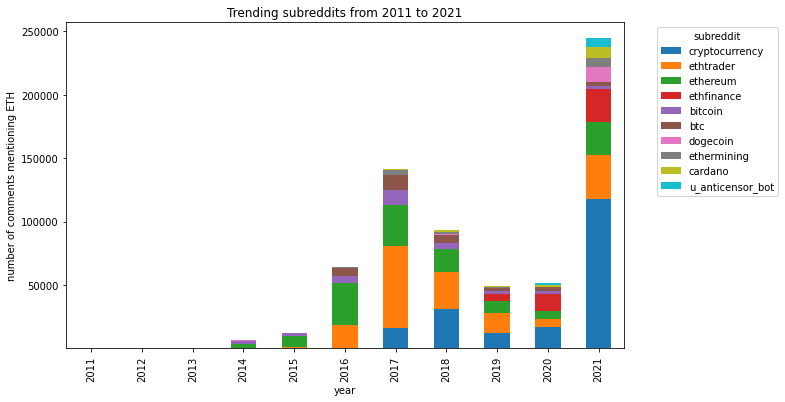

In [91]:
pivot2.plot.bar(stacked=True, figsize=(10, 6), ylabel='number of comments mentioning ETH', xlabel='year', title='Trending subreddits from 2011 to 2021')
plt.legend(title='subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### ETH was created in July 2015, as expected the number of comments mentioning ETH began to increase significantly in 2016.
#### Crypto markets had a large bull run in late 2017 to early 2018, this is reflected in the large peak in 2017 of reddit comments that mentioned ethereum. It is worth to note that, most comments were posted on either ethtrader and ethereum which are specific to ETH, but not much on the general 'cryptocurrency' subreddit. 

#### As the markets cooled down in 2019 and 2020, interest in cryptocurrency and ETH began to dwindle, the parabolic price spike in 2021 is reflected in the bar chart, with over 4 times increase in the number of comments compared to the previous year (2020).
### Overall, there is a clear correlation between ETH price history and the reddit trend. Over the years, ETH has gain more mainstream media attention and there has been a migration of commenters into the general subreddits like 'r/cryptocurrency'. 


[*********************100%***********************]  1 of 1 completed


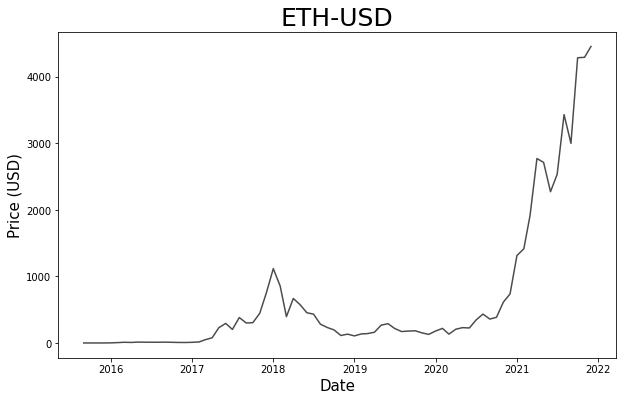

In [92]:
ETH_price = yf.download('ETH-USD', period="max", interval="1mo") 
plt.figure(figsize=(10,6))
plt.plot(ETH_price.Close, color='k',alpha=0.7)
plt.title(label= 'ETH-USD',fontsize=25)
plt.ylabel(ylabel= 'Price (USD)', fontsize=15)
plt.xlabel(xlabel='Date', fontsize=15)
plt.show()

### Sentiment analysis
#### Each comment is assigned a sentiment score base on whether the piece of text is negative, positive or neutral. This is achieved using a Sentiment Analyzer package. The sentiment score ranges between -1 and 1 where, 1 is extremely positive, 0 is neutral and -1 is extremely negative. 

#### for this analysis we will assume that comments with a sentiment score of between 0.2 to -0.2 are considered neutral.

In [93]:
col = 'sentiment'
conditions = [df[col] > 0.2, (df[col] < 0.2) &(df[col] > -0.2), df[col] <-0.2]
choices = [1,0,-1]

In [94]:
df["label"] = np.select(conditions, choices, default=np.nan)

In [95]:
print(df.label.value_counts())

 1.0    673170
 0.0    236337
-1.0    192022
Name: label, dtype: int64


In [96]:
#normalize data
print(df.label.value_counts(normalize=True) * 100)

 1.0    61.112327
 0.0    21.455359
-1.0    17.432315
Name: label, dtype: float64


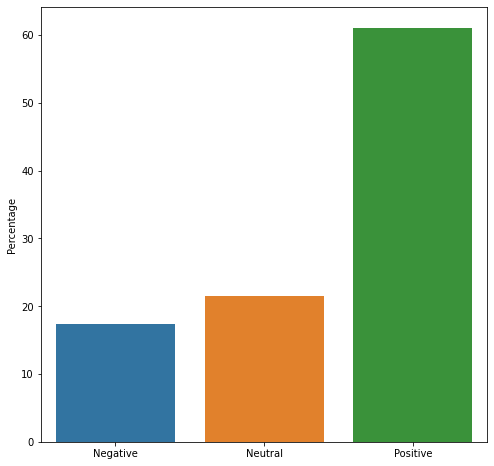

In [97]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()


#### There are limitations to this analysis:
#### Reddit has a karma system, which is essentially a total of upvotes against downvotes. Whilst, it has very few practical benefit, High karma count typically means the user's posts and comments are well liked and therefore they are viewed as highly reputable members of the community. The downside to this may incentivise users to post popular opinions that chim with the sentiment of that community to 'farm' upvotes. 
#### This is especially prevalent in ETH-specific subreddits such as ETHtrader, ethereum and ethfinance.

In [98]:
group2 = df.groupby(["year","label"]).size().reset_index(name="values")
group2.sort_values('values', ascending=False, inplace=True)

In [99]:
piv = group2.pivot(index='year', columns='label', values='values')

In [100]:
mylabels =['Negative', 'Neutral', 'Positive']

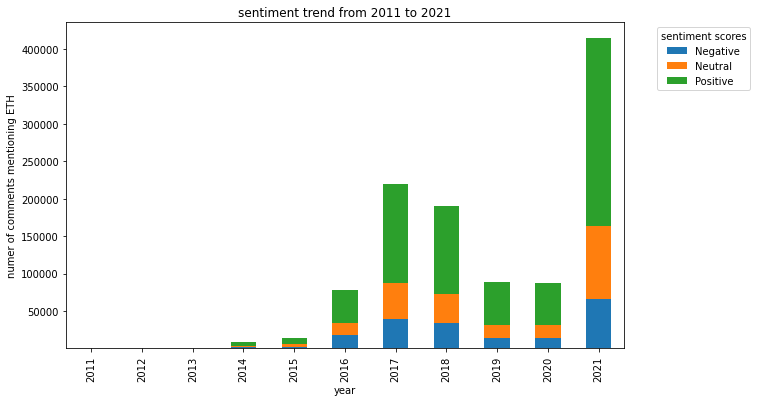

In [101]:
piv.plot.bar(stacked=True, figsize=(10, 6), ylabel='numer of comments mentioning ETH', xlabel='year', title='sentiment trend from 2011 to 2021')
plt.legend(title='sentiment scores', labels=mylabels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### We will then generate a word distribution of the most common words within the comments that are associated with their respective sentiment labels.
### Tokenization is the process of breaking a stream of text up into meaningful elements called tokens. You can tokenize a paragraph into sentences, a sentence into words and so on.

In [102]:
!pip install nltk

In [103]:
# we will be use the tokenize packages from nltk library, if you dont have this you can install this using pip install nltk
import nltk

In [104]:
# words such as 'the', 'and', 'i', 'we' are somewhat irrelevant to text sentiment and dont provide any valuable information. These are called stopwords.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\b5-chen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [157]:
from nltk.corpus import stopwords

In [158]:
stops = nltk.corpus.stopwords.words('english')

In [107]:
print(stopword1)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [159]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [160]:
tokenizer = RegexpTokenizer(r'\w+')

In [165]:
# def a function that will read a list of comments and perform lowercasing, tokenizing and stopword removal
def process_text(comments):
    tokens = []
    for line in comments:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stops]
        tokens.extend(toks)
    
    return tokens

In [166]:
# some of these words are not useful so lets remove them by updating the stop words dictionary
newstopwords = ['r','com','would','one', '1', '0','also', '2','www','https','gt', 'get','think','see','reddit','even','crypto']

stops.extend(newstopwords)

In [163]:
# positive words
pos_lines = list(df[(df.label == 1) & (df['subreddit.name'] == "cryptocurrency")].body)
pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(20)

[('ethereum', 151708),
 ('cryptocurrency', 52267),
 ('bitcoin', 49759),
 ('like', 42372),
 ('eth', 33772),
 ('comments', 27645),
 ('old', 27113),
 ('blockchain', 23603),
 ('people', 23570),
 ('wiki', 22808),
 ('network', 21534),
 ('amp', 21124),
 ('use', 19692),
 ('smart', 18306),
 ('first', 18046),
 ('coins', 17336),
 ('sort', 17173),
 ('controversial', 16263),
 ('market', 16053),
 ('btc', 15797)]

In [113]:
# now for negative words
neg_lines = list(df[(df.label == -1) & (df['subreddit.name'] == "cryptocurrency")].body)
neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)
neg_freq.most_common(20)

[('ethereum', 57235),
 ('wiki', 44956),
 ('cryptowikis', 44688),
 ('ethereum_basicinfo', 22344),
 ('cryptocurrency', 14870),
 ('eth', 14508),
 ('bitcoin', 12971),
 ('arguments', 12177),
 ('policy', 11377),
 ('amp', 8712),
 ('people', 7502),
 ('exchanges', 6460),
 ('please', 6395),
 ('message', 6291),
 ('bot', 6197),
 ('history', 6195),
 ('compose', 6143),
 ('subreddit', 6079),
 ('like', 6068),
 ('org', 6051)]

#### We can see that the lists containing the top 20 most frequently appearing words for both postive and negative sentiments are almost identical. We are unable to draw any conclusions from the most frequent words.

#### Another option is to look at monthly trends, in order to capture shifts in sentiments and useful insight.

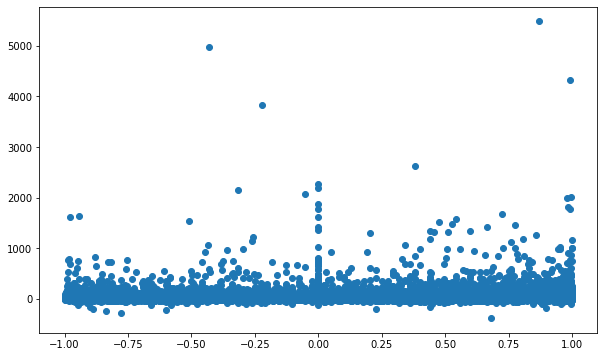

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(df.sentiment, df.score)
plt.show()

In [188]:
start_oct = dt.datetime(year=2021,month=10, day=1)
end_oct = dt.datetime(year=2021, month=10, day=31)

temp_df = df.loc[(df['time'].between(start_oct,end_oct)),['subreddit.name','body','label']]

In [117]:
temp_df

,subreddit.name,body,label
2979,solana,"Yep its still up 85% in the last 2 days. Ive had SAMO for a month now so you tell me if its me whining about being down on my initial investment lol. And #2 your argument is shit. You realize that before SOL went to $200 it was down to $126 from $190 right? Can you make the same argument if I was supporting Solana then? Or what about Ethereum when it dropped from $4,200 to $1,700? Using your logic, they only supported it because theyre down more than 50%? \nLong story short: you can get infuriated and salty all you want, but can you prove that what I said is wrong?",-1.0
2980,cardanomarkets,"""Cardano is up 2,000% and Ethereum up 900% in a year.""\n\nWhat time period are you looking at? This year? LOL You are definitely not a statistician and if it is this year then your figures are way off. You made it up or you failed your math class.",1.0
2981,anchor,So I bought UST on Gemini not realizing it is on the ethereum network.. how do i get around this? Any help would be appreciated!,1.0
2982,dogelon,Decentralized exchange built on Ethereum - the place where many of the meme-coins are born.,0.0
2983,superstonk,yeah but nft items are available either on ethereum or on polygon. most of opensea stuff (and the popular one) are on the ethereum chain,1.0
...,...,...,...
40246,nanocurrency,"Everyone in this community is super genuine and nice. But it's becoming pretty obvious this project is and will continue to lag behind the new wave of crypto adoption. \n\nIt's all well and good to pay the kids in the neighborhood or your financial advisor (!?!?) If they choose to accept it. But stuff like that would be an achievement in 2017... We are almost 2022 and that's just not really exciting enough \n\nI could just be a bit salty, seeing as I converted all my Ethereum to Nano in 2017 or 2018 I can't remember exactly haha. So take my opinion with that in consideration.\n\nBut I believed in the vision and still don't quite understand how it fell behind so much. Safe to say it was a terrible financial decision though. And good luck to any of you who continue to hodl. I'm pretty close to converting it into another project though..",1.0
40247,safemoon,"I would have doubted our chances a few months ago but I think there's a good chance we end up on Coinbase by March of 2022. We now have an Ethereum pair and an ERC-20 token. Coinbase only lists, ERC-20 tokens for the most part. They're a US centric exchange and we've got US born founders an a headquarters in the US. Also Coinbase is rumored to be working on a pay check deposit feature that lets you deposit your paycheck with them and receive cryptocurrency in return. Combine that with a Safemoon listing and the Coinbase card and you've got a new off ramp for your Safemoon. Until we drop our own card of course.",1.0
40248,ethereum,"""breaking news, Layer 2 whose entire existence depends on Ethereum says ethereum is the best""",1.0
40249,cryptocurrency,"Here’s a new scratcher to welcome you to the new daily! Pick wisely, and pick only one to DCA to today! \n\n&gt;! Binance !&lt;\n\n&gt;! Polkadot !&lt;\n\n&gt;! Ethereum !&lt;\n\n&gt;! Harmony !&lt;\n\n&gt;! Polygon !&lt;\n\n&gt;! Cardano !&lt;\n\n&gt;! Bitcoin !&lt;\n\n&gt;! Solana !&lt;\n\n&gt;! VeChain !&lt;\n\n&gt;! Avalanche !&lt;",1.0


In [167]:
pos_lines = list(temp_df[(temp_df.label == 1) & (temp_df['subreddit.name'] == "cryptocurrency")].body)
pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(20)

[('ethereum', 9337),
 ('cryptocurrency', 6328),
 ('wiki', 4275),
 ('old', 3273),
 ('comments', 2700),
 ('amp', 2430),
 ('bitcoin', 2429),
 ('sort', 2154),
 ('controversial', 2123),
 ('cointest_archive', 2116),
 ('like', 2036),
 ('eth', 1986),
 ('first', 1600),
 ('network', 1456),
 ('work', 1419),
 ('bot', 1368),
 ('moons', 1225),
 ('en', 1223),
 ('org', 1194),
 ('please', 1143)]

In [170]:
neg_lines = list(temp_df[(temp_df.label == -1) & (temp_df['subreddit.name'] == "cryptocurrency")].body)
neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)
neg_freq.most_common(20)

[('ethereum', 1818),
 ('bitcoin', 414),
 ('eth', 414),
 ('people', 321),
 ('fees', 312),
 ('like', 253),
 ('gas', 226),
 ('network', 177),
 ('use', 176),
 ('cardano', 170),
 ('time', 161),
 ('money', 160),
 ('coin', 146),
 ('btc', 144),
 ('chain', 143),
 ('coins', 140),
 ('much', 139),
 ('blockchain', 132),
 ('going', 128),
 ('market', 128)]

In [172]:
pos_df = pd.DataFrame(pos_freq.most_common(20), columns= ['word','frequency'])
neg_df = pd.DataFrame(neg_freq.most_common(20), columns= ['word','frequency'])

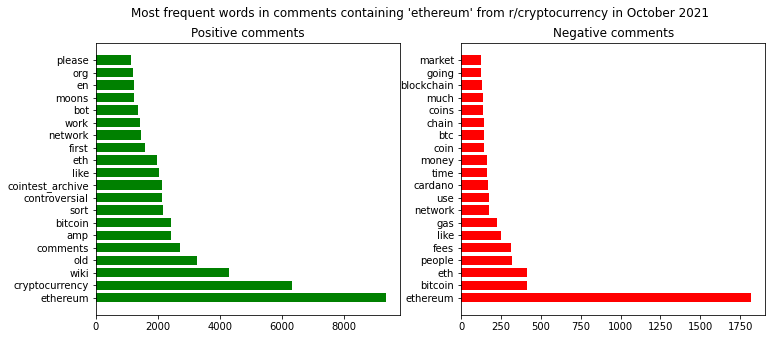

In [182]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.barh(pos_df['word'], pos_df['frequency'], height=0.75, color="green")
ax2.barh(neg_df['word'], neg_df['frequency'], height=0.75, color="red")
plt.suptitle("Most frequent words in comments containing 'ethereum' from r/cryptocurrency in October 2021")
ax1.title.set_text("Positive comments")
ax2.title.set_text("Negative comments")
plt.show()

### You can also find bi-grams or tri-grams 

In [125]:
from collections import Counter
from itertools import chain

In [184]:
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

In [193]:

temp = pd.DataFrame()
temp['bigrams'] = (temp_df[(temp_df.label == 1) & (temp_df['subreddit.name'] == "cryptocurrency")].body).map(lambda x: find_ngrams(x.split(" "),2))
temp.head()

,bigrams
2995,"[(I'll, answer), (answer, your), (your, second), (second, question), (question, first.), (first., Bank), (Bank, transfer), (transfer, to), (to, and), (and, from), (from, centralised), (centralised, exchanges), (exchanges, like), (like, Binance), (Binance, are), (are, easy), (easy, enough.), (enough., Similar), (Similar, to), (to, transferring), (transferring, money), (money, to), (to, any), (any, brokering), (brokering, app.), (app., \n\nRegarding), (\n\nRegarding, your), (your, first), (first, question,), (question,, Pancakeswap), (Pancakeswap, is), (is, not), (not, available), (available, on), (on, Binance), (Binance, app.), (app., My), (My, understanding), (understanding, is), (is, only), (only, limited), (limited, but), (but, I), (I, think), (think, Pancakeswap), (Pancakeswap, is), (is, a), (a, decentralised), (decentralised, exchange), (exchange, of), (of, tokens/coins), (tokens/coins, made), (made, on), (on, Binance), (Binance, Smart), (Smart, Chain.), (Chain., (), ((, I), (I, think), (think, they), (they, also), (also, are), (are, able), (able, to), (to, provide), (provide, coins), (coins, and), (and, tokens), (tokens, made), (made, on), (on, other), (other, block), (block, chains), (chains, as), (as, wrapped), (wrapped, tokens,), (tokens,, which), (which, are), (are, just), (just, a), (a, representative), (representative, of), (of, the), (the, actual), (actual, coin/token), (coin/token, but), (but, on), (on, Binance), (Binance, Smart), (Smart, Chain), (Chain, but), (but, I), (I, digress).), (digress)., \n\nIn), (\n\nIn, order), (order, to), (to, use), (use, a), (a, decentralised), (decentralised, exchange), ...]"
3020,"[(Mana, pumped), (pumped, insanely), (insanely, and), (and, when), (when, a), (a, huge), (huge, number), (number, was), (was, transferred), (transferred, to), (to, Ethereum), (Ethereum, blockchain), (blockchain, it), (it, started), (started, coming), (coming, down)]"
3033,"[(All, this), (this, shitcoins), (shitcoins, run), (run, on), (on, the), (the, Ethereum), (Ethereum, network), (network, so), (so, if), (if, you), (you, hold), (hold, Eth,), (Eth,, they're), (they're, doing), (doing, you), (you, a), (a, favor), (favor, and), (and, keeping), (keeping, the), (the, price), (price, of), (of, Eth), (Eth, up)]"
3051,"[(**MOST, discussed), (discussed, Cryptocurrencies), (Cryptocurrencies, on), (on, /r/CryptoCurrency), (/r/CryptoCurrency, (30/10/21):**\n\n), ((30/10/21):**\n\n, ), (, ), (, ), (, 1.), (1., Ethereum), (Ethereum, (2234), ((2234, Mentions).\n), (Mentions).\n, ), (, ), (, ), (, 2.), (2., Bitcoin), (Bitcoin, (1474), ((1474, Mentions).\n), (Mentions).\n, ), (, ), (, ), (, 3.), (3., Dogecoin), (Dogecoin, (731), ((731, Mentions).\n), (Mentions).\n, ), (, ), (, ), (, 4.), (4., Cardano), (Cardano, (621), ((621, Mentions).\n), (Mentions).\n, ), (, ), (, ), (, 5.), (5., Shiba), (Shiba, Inu), (Inu, (601), ((601, Mentions).\n\n**Biggest), (Mentions).\n\n**Biggest, Changes:**\n\n-\tETH), (Changes:**\n\n-\tETH, has), (has, taken), (taken, the), (the, top), (top, spot), (spot, today,), (today,, moving), (moving, up), (up, from), (from, 2nd), (2nd, place), (place, yesterday.), (yesterday., BTC), (BTC, has), (has, also), (also, moved), (moved, up), (up, a), (a, position), (position, from), (from, 3rd), (3rd, to), (to, 2nd), (2nd, place), (place, today.\n-\tOther), (today.\n-\tOther, than), (than, that,), (that,, the), (the, Top), (Top, 5), (5, mentioned), (mentioned, coins), (coins, remain), (remain, the), (the, same), (same, as), (as, yesterday.), (yesterday., Shiba), (Shiba, Inu), (Inu, has), (has, slipped), (slipped, from), (from, 3rd), (3rd, to), (to, 5th), (5th, place,), (place,, after), (after, seeing), (seeing, a), (a, nearly), (nearly, 40%), (40%, drop), (drop, in), (in, mentions.\n-\tSpecial), (mentions.\n-\tSpecial, shoutouts), (shoutouts, also), (also, go), (go, out), ...]"
3053,"[(*, **[Ethereum](https://en.wikipedia.org/wiki/Ethereum)), (**[Ethereum](https://en.wikipedia.org/wiki/Ether

In [194]:
bigrams = temp['bigrams'].tolist()
bigrams = list(chain(*bigrams))
bigrams = [(x.lower(), y.lower()) for x,y in bigrams]
bigrams = [gram for gram in bigrams if not any(stop in gram for stop in stops)]
bigram_counts = Counter(bigrams)
bigram_counts.most_common(20)

[(('', ''), 3555),
 (('*', '**[ethereum](https://en.wikipedia.org/wiki/ethereum)'), 1058),
 (('**[ethereum](https://en.wikipedia.org/wiki/ethereum)',
   '[pros](https://old.reddit.com/r/cryptocurrency/wiki/cointest_archive#wiki_eth_pros)'),
  1058),
 (('[pros](https://old.reddit.com/r/cryptocurrency/wiki/cointest_archive#wiki_eth_pros)',
   '&amp;'),
  1058),
 (('&amp;',
   '[cons](https://old.reddit.com/r/cryptocurrency/wiki/cointest_archive#wiki_eth_cons)**'),
  1058),
 (('[cons](https://old.reddit.com/r/cryptocurrency/wiki/cointest_archive#wiki_eth_cons)**',
   '-'),
  1058),
 (('-', 'participate'), 1058),
 (('r\\/cc',
   '[cointest](https://old.reddit.com/r/cryptocurrency/wiki/cointest_policy)'),
  1058),
 (('potentially', 'win'), 1058),
 (('win', 'moons.'), 1058),
 (('moons.', 'prize'), 1058),
 (('prize', 'allocations:'), 1058),
 (('allocations:', '1st'), 1058),
 (('1st', '-'), 1058),
 (('-', '300,'), 1058),
 (('300,', '2nd'), 1058),
 (('2nd', '-'), 1058),
 (('-', '150,'), 1058),


In [191]:
temp = pd.DataFrame()
temp['trigrams'] = (temp_df[(temp_df.label == 1) & (temp_df['subreddit.name'] == "cryptocurrency")].body).map(lambda x: find_ngrams(x.split(" "),3))
temp.head()

,trigrams
2990,"[(Oh, the, classic), (the, classic, ""you), (classic, ""you, used), (""you, used, too), (used, too, many), (too, many, words""), (many, words"", defense), (words"", defense, of), (defense, of, the), (of, the, bright), (the, bright, minds), (bright, minds, of), (minds, of, Reddit.), (of, Reddit., I), (Reddit., I, tapped), (I, tapped, that), (tapped, that, out), (that, out, on), (out, on, the), (on, the, toilet), (the, toilet, in), (toilet, in, a), (in, a, few), (a, few, minutes,), (few, minutes,, sorry), (minutes,, sorry, I), (sorry, I, didn't), (I, didn't, keep), (didn't, keep, it), (keep, it, short), (it, short, enough), (short, enough, to), (enough, to, keep), (to, keep, your), (keep, your, attention), (your, attention, span.), (attention, span., So), (span., So, I), (So, I, looked), (I, looked, it), (looked, it, up), (it, up, to), (up, to, see), (to, see, how), (see, how, someone), (how, someone, would), (someone, would, define), (would, define, ""meme), (define, ""meme, token""\n\n&gt;Typically,), (""meme, token""\n\n&gt;Typically,, a), (token""\n\n&gt;Typically,, a, meme), (a, meme, coin), (meme, coin, has), (coin, has, no), (has, no, inherent), (no, inherent, value,), (inherent, value,, and), (value,, and, often), (and, often, no), (often, no, utility.), (no, utility., As), (utility., As, the), (As, the, name), (the, name, implies,), (name, implies,, these), (implies,, these, cryptocurrencies), (these, cryptocurrencies, are), (cryptocurrencies, are, often—but), (are, often—but, not), (often—but, not, exclusively—themed), (not, exclusively—themed, around), (exclusively—themed, around, Internet), (around, Internet, memes:), (Internet, memes:, jokes), (memes:, jokes, and), (jokes, and, images), (and, images, shared), (images, shared, on), (shared, on, social), (on, social, media.\n\nDon't), (social, media.\n\nDon't, read), (media.\n\nDon't, read, it,), (read, it,, that's), (it,, that's, fine), (that's, fine, -), (fine, -, just), (-, just, look), (just, look, at), (look, at, the), (at, the, first), (the, first, two), (first, two, sentences.), (two, sentences., I), (sentences., I, am), (I, am, suggesting), (am, suggesting, people), (suggesting, people, do), (people, do, **actually**), (do, **actually**, do), (**actually**, do, their), ...]"
3152,"[(Have, you, not), (you, not, seen), (not, seen, Ethereum), (seen, Ethereum, gas), (Ethereum, gas, fees?), (gas, fees?, Worse), (fees?, Worse, than), (Worse, than, banks!)]"
3181,"[(Algorand, financial, goals), (financial, goals, is), (goals, is, to), (is, to, keep), (to, keep, funding), (keep, funding, going), (funding, going, for), (going, for, project), (for, project, development), (project, development, teams), (development, teams, and), (teams, and, not), (and, not, to), (not, to, pump), (to, pump, price), (pump, price, up.), (price, up., Chainlink), (up., Chainlink, is), (Chainlink, is, in), (is, in, the), (in, the, same), (the, same, strategy.), (same, strategy., Such), (strategy., Such, projects), (Such, projects, hold), (projects, hold, over), (hold, over, 60%), (over, 60%, of), (60%, of, total), (of, total, supply), (total, supply, and), (supply, and, dump), (and, dump, it), (dump, it, on), (it, on, the), (on, the, market), (the, market, on), (market, on, a), (on, a, consistent), (a, consistent, basis), (consistent, basis, with), (basis, with, regular), (with, regular, 5%), (regular, 5%, volume), (5%, volume, dumps), (volume, dumps, and), (dumps, and, sometimes), (and, sometimes, more.), (sometimes, more., That), (more., That, in), (That, in, itself), (in, itself, scarce), (itself, scarce, of), (scarce, of, serious), (of, serious, investors), (serious, investors, and), (investors, and, as), (and, as, combination), (as, combination, keep), (combination, keep, prices), (keep, prices, relatively), (prices, relatively, low.), (relatively, low., Algorand), (low., Algorand, isn't), (Algorand, isn't, gonna), (isn't, gonna, be), (gonna, be, next), (be, next, Ethereu

In [192]:
trigrams = temp['trigrams'].tolist()
trigrams = list(chain(*trigrams))
trigrams = [(x.lower(), y.lower(), z.lower()) for x,y,z in trigrams]
trigrams = [gram for gram in trigrams if not any(stop in gram for stop in stops)]
trigram_counts = Counter(trigrams)
trigram_counts.most_common(20)

[(('', '\n&gt;', ''), 18),
 (('#', 'burn', 'baby'), 14),
 (('burn', 'baby', 'burn!🔥\n###another'), 14),
 (('baby', 'burn!🔥\n###another', 'reason'), 14),
 (('ethereum.', '\nsince', 'eip-1559:'), 14),
 (('', '', '*'), 13),
 (('ethereum', 'gas', 'fees'), 11),
 (('high', 'gas', 'fees'), 9),
 (('', '', ''), 7),
 (('!\n###', 'another', 'reason'), 7),
 (('ethereum:\nto', 'date,', "there's"), 7),
 (('', '', '•'), 6),
 (('', '•', ''), 6),
 (('top', '10', 'coins'), 5),
 (('ethereum', 'co-founder', 'vitalik'), 5),
 (('co-founder', 'vitalik', 'buterin'), 4),
 (('still', 'thriving', 'despite'), 4),
 (('serious', 'question', '-'), 3),
 ((':\n\n•', '', 'bitcoin'), 3),
 (('', 'bitcoin', 'dominance:'), 3)]